# PCA and K-Means

Structure:  
    1. Load data  
    2. Perform PCA and check eigenvalues  
    3. Perform k-means with different values of k  
    4. Kernel versions of PCA and k-means  
    5. Convolutional neural networks for image classification

Loading and processing the data

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline

dataset = datasets.load_breast_cancer()
X = pd.DataFrame(dataset['data'])
y = pd.DataFrame(dataset['target'])
y.columns = ['labels']


### Task 1: Perform PCA and plot the first two principal components

We can preprocess the data so that they are standardised. scikit-learn has a preprocessing module that has a [`sklearn.preprocessing.StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), which we can use.

We will then use the [`sklearn.decomposition.PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to carry out PCA. 
An important parameter that can be passed in when initialising the model is `n_components`. As you can guess, this will set the number of principal components we want.

`sklearn.decomposition.PCA()` has the same pattern as most sklearn models, so we can fit our data to it by doing PCA.fit(X=data). 

This model also has a `PCA.fit_transform(X=data)` which does the fit, and outputs the transformed data. 

/Users/luischavesrodriguez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/Users/luischavesrodriguez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


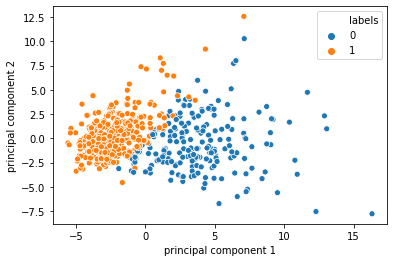

In [2]:
# Standardizing the features to zero mean and unit variance
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

# Apply PCA with sklearn
from sklearn.decomposition import PCA

# Do PCA for n_components = 30.
myPCA = PCA(n_components= 30)

# Calculate the projected datapoints. You can use PCA.fit_transform(X=data) to do this directly.
principalComponents = myPCA.fit_transform(X=X)

# Extract the projections of the first 2 components
principalComponents_2 = principalComponents[:, :2]


# Plot the first 2 components
principalDf = pd.DataFrame(data = principalComponents_2, columns = ['principal component 1', 'principal component 2'])
# Merge with labels
finalDf = pd.concat([y, principalDf], axis = 1)
finalDf.column = ['labels', 'principal component 1', 'principal component 2']


import seaborn as sns
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="labels",
                     data=finalDf)

### Task 2: Create a scree plot of the principal components

A [scree plot](https://en.wikipedia.org/wiki/Scree_plot) shows how some 'explanatory' factor varies with the component number. Here we will use [`PCA.explained_variance_`](https://eranraviv.com/understanding-variance-explained-in-pca/) to show us the amount of variance that is explained by each of the components.  

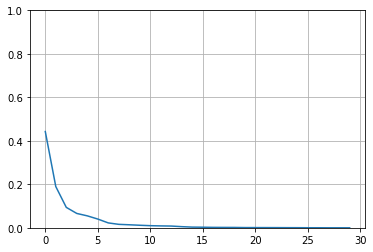

In [9]:
#Plot component number vs explained_variance.
plt.plot(myPCA.explained_variance_ratio_)
plt.ylim((0,1))
plt.grid()

### Task 3: Calculate and print the eigenvalues 
Are the projected values as you would expect?

You can manually compute the covariance matrix using `numpy` with its `np.cov()` method. Keep in mind that we are interested in the variability of the features. Note that you might have to transpose your data matrix.

Eigenvalues and eigenvectors can be calculated using `np.linalg.eig(cov_matrix)`. This returns a tuple `(eig_vals, eig_vec)`.

In [13]:
# Compute the covariance matrix.
covx = np.cov(X.T)

Documentation of np.cov: "m : array_like
A 1-D or 2-D array containing multiple variables and observations. __Each row of m represents a variable, and each column a single observation of all those variables__. Also see rowvar below."

[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]


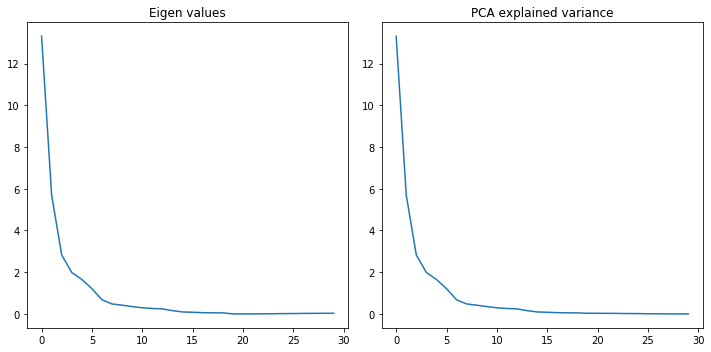

In [32]:
# Compute the eigenvectors
eig_vals, eig_vecs =np.linalg.eig(covx)

print(eig_vals)

# Do you notice something about the values of the eig_vals and the explained_variance from above?
fig, (ax1,ax2) = plt.subplots(1,2, figsize =(10,5))
ax1.plot(eig_vals)
ax1.set_title("Eigen values")
ax2.plot(myPCA.explained_variance_)
ax2.set_title("PCA explained variance")
plt.tight_layout()

### Task 4: Perform K-means clustering for different values of K and plot the resulting clusters

Scikit learn has a model for this: [`sklearn.cluster.KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). The key parameter we can adjust here is the number of clusters, set by the value of `num_clusters`.

As with `sklearn.decomposition.PCA()`, `sklearn.cluster.KMeans()` has a method `KMeans.fit_predict` which runs the fitting and outputs the center of the clusters our data points belong to. 

Lets look at how changing this affects our clustering.

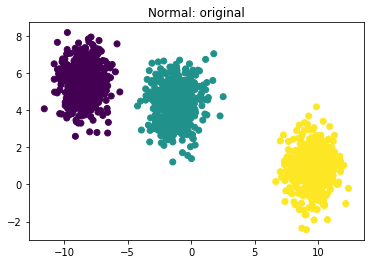

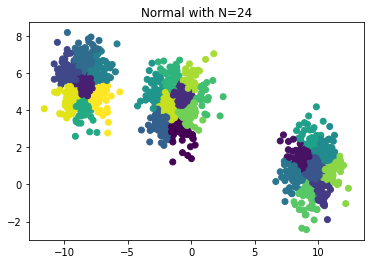

In [39]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create some data
n_samples = 1500

title='Normal'
X, y = make_blobs(n_samples=n_samples, random_state=7)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title(f'{title}: original')
plt.show()



def plot_kmeans_n(n=2, data_set=X):
    # Initiate a KMeans() model that takes in num_clusters as a variable n.
    mod = KMeans(n_clusters = n)
    
    # Predict the centers of the datasets using fit_predict(data_set) that takes in the variable data_set.

    y_pred = mod.fit_predict(X)
    # Plot
    plt.scatter(data_set[:, 0], data_set[:, 1], c=y_pred)
    plt.title(f'{title} with N={n}')
    plt.show()

# Try running this function for different values of n
plot_kmeans_n(24, X)


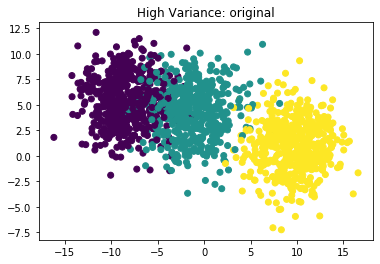

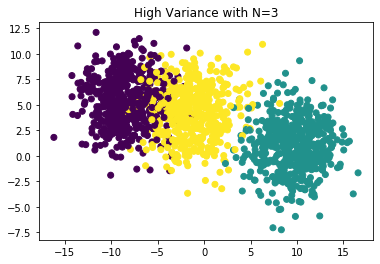

In [43]:
# Now lets try a data set that is not as clearly separated.
title='High Variance'
X_var, y_var = make_blobs(n_samples=n_samples, 
                  cluster_std=[2.5, 2.5, 2.5],
                  random_state=7)

plt.scatter(X_var[:, 0], X_var[:, 1], c=y_var)
plt.title(f'{title}: original')
plt.show()

# Run the same function we defined above, but set data_set=X_var
plot_kmeans_n(3, X_var)


### Task 5: Kernel PCA. Using the data generated below, apply kernel PCA and plot the principal components

As you can imagine, sklearn has a model called [`sklearn.decomposition.KernalPCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html), which also has a `fit_transform` method, similar to `sklearn.decomposition.PCA()`.

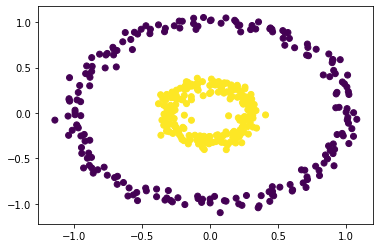

(400, 2)

In [54]:
from sklearn.datasets import make_circles

# Create a dataset that is not easily separable.
X_circle, y_circle = make_circles(n_samples=400, factor=.3, noise=.05)

plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle)
plt.show()

X_circle.shape

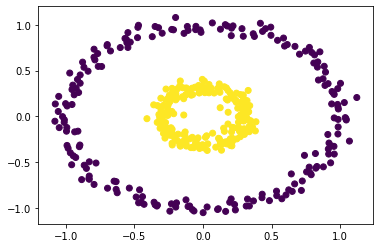

In [70]:
# Lets look at what we get if we apply regular PCA first
# Run PCA on the X_circle data and get the projected data.

myPCA2 = PCA(n_components = 2)

X_pca = myPCA2.fit_transform(X = X_circle)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_circle)
plt.show()



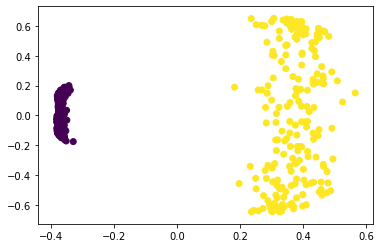

In [71]:
# Apply the same techniques in PCA, but with using KernelPCA instead
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=5)
X_kpca = kpca.fit_transform(X_circle)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_circle)
plt.show()


# Try changing the value of gamma to see what it does.

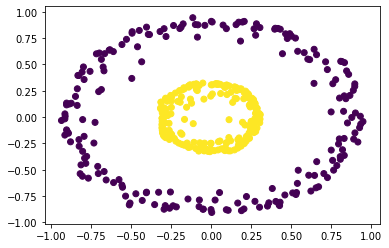

In [72]:
# We can do an inverse transform on the projected data using KernalPCA.inverse_transform(projected_data).
# Note that PCA cannot capture all the variance. See what happens.
X_back = kpca.inverse_transform(X_kpca)

plt.scatter(X_back[:, 0], X_back[:, 1], c=y_circle)
plt.show()



References:
    https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set
    https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60